##Scrapping Google Apps Review DaFit App


In [1]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.7 MB/s eta 0:00:00


In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

In [3]:
#Android App Da Fit from Google Play at
#https://play.google.com/store/apps/details?id=com.crrepa.band.dafit&hl=en_SG
#The apps ID found in the link after id=com.crrepa.band.dafit
#The apps name on Google Play titled: Da Fit
#Dated 3 March 2025 and N of reviews 787K

from google_play_scraper import app, Sort, reviews_all

daft_reviews = reviews_all(
    'com.crrepa.band.dafit',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [4]:
#Save Mobile daft reviews into dataframe
df_dafitrev = pd.DataFrame(np.array(daft_reviews),columns=['content'])
df_dafitrev = df_dafitrev.join(pd.DataFrame(df_dafitrev.pop('content').tolist()))
df_dafitrev.to_csv(r'df_dafitrev', index=False)

In [5]:
df_dafitrev

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c70fc013-ec31-485d-ab45-1e6a9d7be561,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Excellent,4,0,v2.8.3-111-geb91bfe647,2025-03-12 03:01:06,None,NaT,v2.8.3-111-geb91bfe647
1,e51a67bd-685e-4a36-85c2-2f5c09f6f0dc,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Nice,5,0,v2.7.5-6-g93f4f236b9-dirty,2025-03-12 02:06:44,None,NaT,v2.7.5-6-g93f4f236b9-dirty
2,83f75d2c-1138-4778-a5a3-67ee2afa9e2b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,its a really great app,5,0,v2.8.3-111-geb91bfe647,2025-03-12 02:05:29,None,NaT,v2.8.3-111-geb91bfe647
3,587bb7e1-4e06-4cb7-9efd-87f06049614e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Très facile a naviguer, app user friendly et h...",5,0,v2.8.3-111-geb91bfe647,2025-03-12 01:15:28,None,NaT,v2.8.3-111-geb91bfe647
4,4c8b000a-dc1e-4698-a2d4-5dd94cbe167f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I can not get the app to sync to a cell phone,...",1,0,v2.8.3-111-geb91bfe647,2025-03-11 23:19:21,None,NaT,v2.8.3-111-geb91bfe647
...,...,...,...,...,...,...,...,...,...,...,...
58428,0441b042-c226-411d-a1b0-9293af36b4aa,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Works great and keeps up my heart rate and oxygen,4,0,v1.0.0-55-g0811733,2018-02-21 19:03:35,None,NaT,v1.0.0-55-g0811733
58429,bc642826-e802-4a17-a8e1-4befaf983f6d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Should have one touch reading for all, or allo...",3,0,v1.0.0-55-g0811733,2018-02-18 05:45:39,None,NaT,v1.0.0-55-g0811733
58430,ab075924-bbe3-4f97-80ee-eb89b7559e97,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,All it does is search for bracelet. Can't get ...,1,2,v1.0.0-55-g0811733,2018-02-08 18:15:29,None,NaT,v1.0.0-55-g0811733
58431,68cb6231-0c18-411c-9a48-c71a9b4cb703,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good,5,0,v1.0.0-55-g0811733,2018-01-16 05:46:35,None,NaT,v1.0.0-55-g0811733


In [6]:
df_dafitrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58433 entries, 0 to 58432
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              58433 non-null  object        
 1   userName              58433 non-null  object        
 2   userImage             58433 non-null  object        
 3   content               58433 non-null  object        
 4   score                 58433 non-null  int64         
 5   thumbsUpCount         58433 non-null  int64         
 6   reviewCreatedVersion  48413 non-null  object        
 7   at                    58433 non-null  datetime64[ns]
 8   replyContent          13 non-null     object        
 9   repliedAt             13 non-null     datetime64[ns]
 10  appVersion            48413 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 4.9+ MB


In [7]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
df_dafitrev.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,Excellent,4,0,v2.8.3-111-geb91bfe647,2025-03-12 03:01:06,None,NaT
1,Nice,5,0,v2.7.5-6-g93f4f236b9-dirty,2025-03-12 02:06:44,None,NaT
2,its a really great app,5,0,v2.8.3-111-geb91bfe647,2025-03-12 02:05:29,None,NaT
3,"Très facile a naviguer, app user friendly et h...",5,0,v2.8.3-111-geb91bfe647,2025-03-12 01:15:28,None,NaT
4,"I can not get the app to sync to a cell phone,...",1,0,v2.8.3-111-geb91bfe647,2025-03-11 23:19:21,None,NaT
...,...,...,...,...,...,...,...
58428,Works great and keeps up my heart rate and oxygen,4,0,v1.0.0-55-g0811733,2018-02-21 19:03:35,None,NaT
58429,"Should have one touch reading for all, or allo...",3,0,v1.0.0-55-g0811733,2018-02-18 05:45:39,None,NaT
58430,All it does is search for bracelet. Can't get ...,1,2,v1.0.0-55-g0811733,2018-02-08 18:15:29,None,NaT
58431,Good,5,0,v1.0.0-55-g0811733,2018-01-16 05:46:35,None,NaT


In [8]:
#Check number of reviews scores
df_dafitrev['score'].value_counts()

,count
score,
5,24914
1,14212
4,7139
3,6942
2,5226


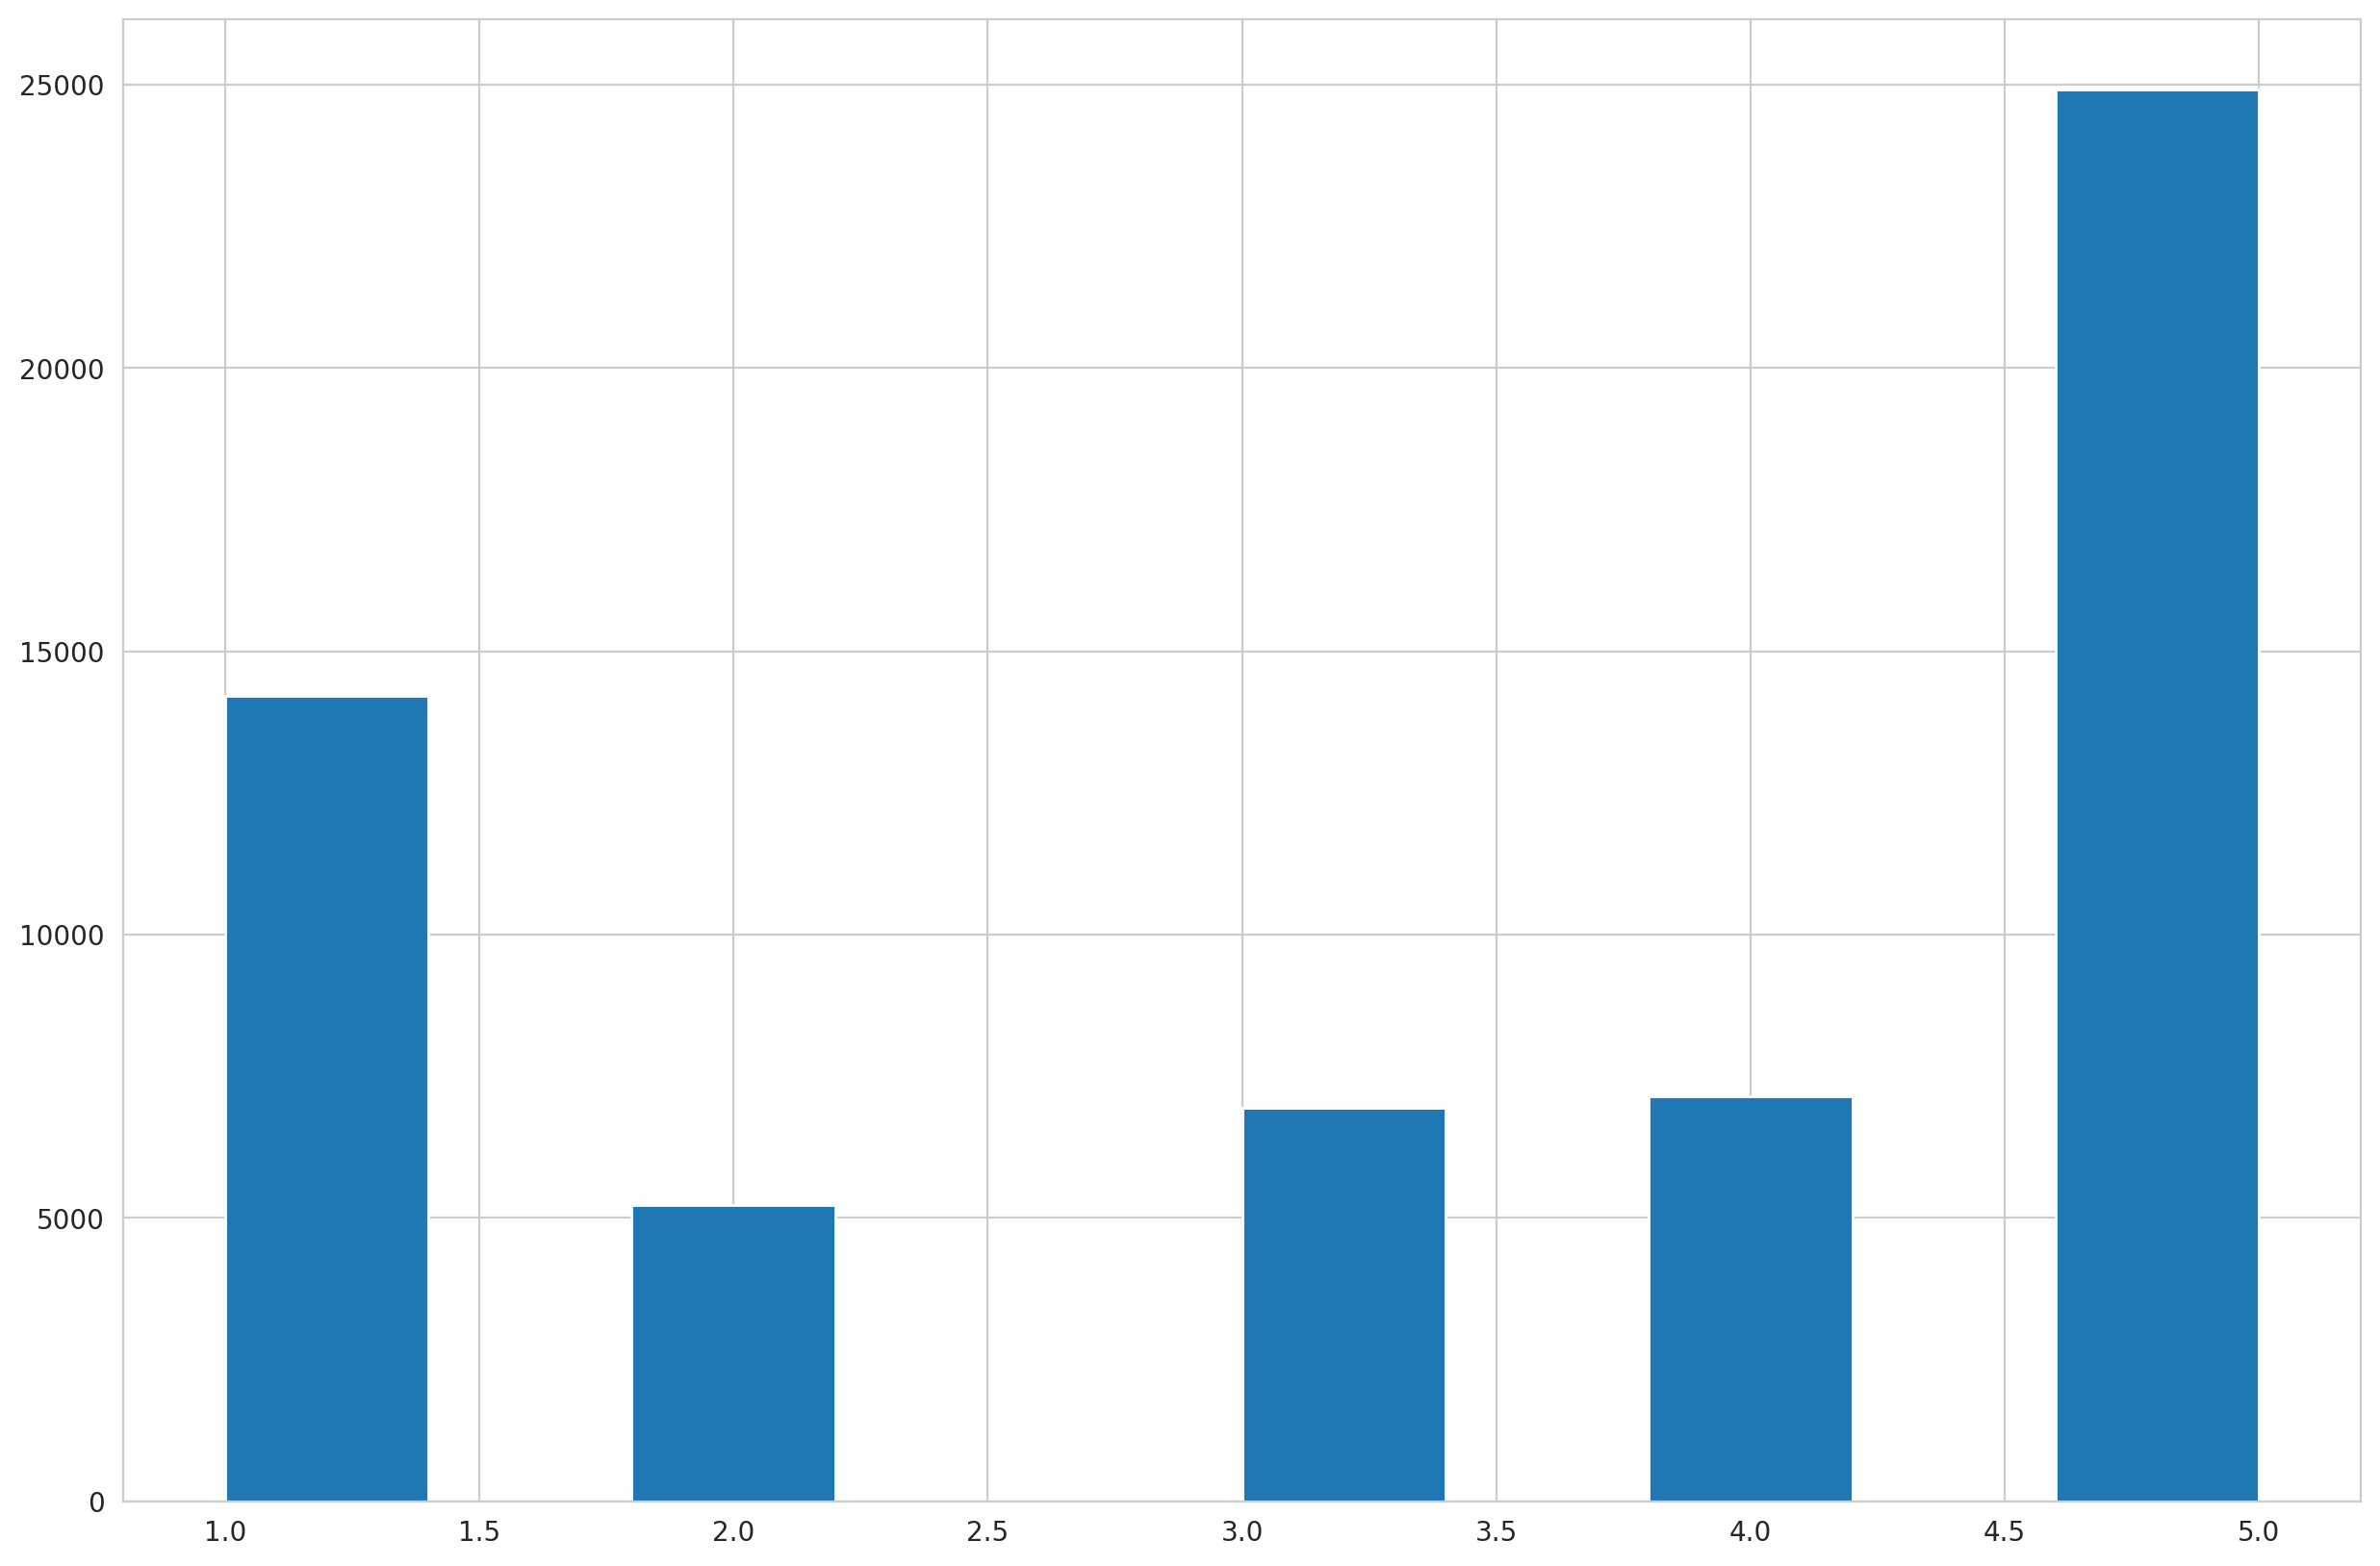

In [9]:
plt.hist(df_dafitrev['score'])
plt.show()

In [10]:
!pip install emoji

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#from pandas_profiling import ProfileReport
import regex
import nltk
import wordcloud
import textblob

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import string
import re
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 6.8 MB/s eta 0:00:00


In [11]:
#Creating polarity on the column: content (review from the apps) using TextBlob
#Read https://textblob.readthedocs.io/en/dev/quickstart.html

from textblob import TextBlob
# Handle None values in 'content' column by replacing them with empty strings
df_dafitrev['sentiment_polarity'] = df_dafitrev['content'].astype(str).apply(lambda x: TextBlob(x).polarity)
df_dafitrev['sentiment_subjective'] = df_dafitrev['content'].astype(str).apply(lambda x: TextBlob(x).subjectivity)

In [12]:
df_dafitrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective"]]

,content,score,sentiment_polarity,sentiment_subjective
0,Excellent,4,1.000000,1.000000
1,Nice,5,0.600000,1.000000
2,its a really great app,5,0.800000,0.750000
3,"Très facile a naviguer, app user friendly et harmonieux aussi, la montre est formidable! Aucun regrets! Excellente idée pour un cadeau!",5,0.156250,0.350000
4,"I can not get the app to sync to a cell phone, laptop, or desktop. I have used Google to find customer care's phone number but have had no luck. I called Amazon customer care 4 days ago & they sai...",1,0.000000,0.000000
...,...,...,...,...
58428,Works great and keeps up my heart rate and oxygen,4,0.800000,0.750000
58429,"Should have one touch reading for all, or allowing pairing and data upload to phone",3,0.000000,0.000000
58430,All it does is search for bracelet. Can't get any settings can't do nothing with it...,1,0.000000,0.000000
58431,Good,5,0.700000,0.600000


## Lowercasing

In [13]:
#DATA PREPROCESSING
# Lower casing
# Change the reviews type to string
df_dafitrev['content'] = df_dafitrev['content'].astype(str)# Before lowercasing
# Before lowercasing
print(df_dafitrev['content'][188])
print(df_dafitrev['content'][1])
print(df_dafitrev['content'][20100])

100% 👌👌
Nice
Worst app


In [14]:
#Lowercase all reviews to see the difference
df_dafitrev['content']= df_dafitrev['content'].apply(lambda x: x.lower())
print(df_dafitrev['content'][188])
print(df_dafitrev['content'][1])
print(df_dafitrev['content'][20100])

100% 👌👌
nice
worst app


##Stopwords Removal
Indonesian Stopwords

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get Indonesian stopwords
indonesian_stopwords = stopwords.words('english')

# Display first 20 stopwords
print(indonesian_stopwords[:20])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_dafitrev['wordCount'] = [len(review.split()) for review in df_dafitrev['content']]
df_dafitrev['uppercaseCharCount'] = [sum(char.isupper() for char in review) \
                              for review in df_dafitrev['content']]
df_dafitrev['specialCharCount'] = [sum(char in string.punctuation for char in review) \
                            for review in df_dafitrev['content']]

In [19]:
df_dafitrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","wordCount","uppercaseCharCount","specialCharCount"]]

,content,score,sentiment_polarity,sentiment_subjective,wordCount,uppercaseCharCount,specialCharCount
0,excellent,4,1.000000,1.000000,1,0,0
1,nice,5,0.600000,1.000000,1,0,0
2,its a really great app,5,0.800000,0.750000,5,0,0
3,"très facile a naviguer, app user friendly et harmonieux aussi, la montre est formidable! aucun regrets! excellente idée pour un cadeau!",5,0.156250,0.350000,21,0,5
4,"i can not get the app to sync to a cell phone, laptop, or desktop. i have used google to find customer care's phone number but have had no luck. i called amazon customer care 4 days ago & they sai...",1,0.000000,0.000000,61,0,10
...,...,...,...,...,...,...,...
58428,works great and keeps up my heart rate and oxygen,4,0.800000,0.750000,10,0,0
58429,"should have one touch reading for all, or allowing pairing and data upload to phone",3,0.000000,0.000000,15,0,1
58430,all it does is search for bracelet. can't get any settings can't do nothing with it...,1,0.000000,0.000000,16,0,6
58431,good,5,0.700000,0.600000,1,0,0


In [20]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df_dafitrev['sentiment_rating'] = df_dafitrev['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [21]:
df_dafitrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,excellent,4,1.000000,1.000000,Positive
1,nice,5,0.600000,1.000000,Positive
2,its a really great app,5,0.800000,0.750000,Positive
3,"très facile a naviguer, app user friendly et harmonieux aussi, la montre est formidable! aucun regrets! excellente idée pour un cadeau!",5,0.156250,0.350000,Positive
4,"i can not get the app to sync to a cell phone, laptop, or desktop. i have used google to find customer care's phone number but have had no luck. i called amazon customer care 4 days ago & they sai...",1,0.000000,0.000000,Negative
...,...,...,...,...,...
58428,works great and keeps up my heart rate and oxygen,4,0.800000,0.750000,Positive
58429,"should have one touch reading for all, or allowing pairing and data upload to phone",3,0.000000,0.000000,Neutral
58430,all it does is search for bracelet. can't get any settings can't do nothing with it...,1,0.000000,0.000000,Negative
58431,good,5,0.700000,0.600000,Positive


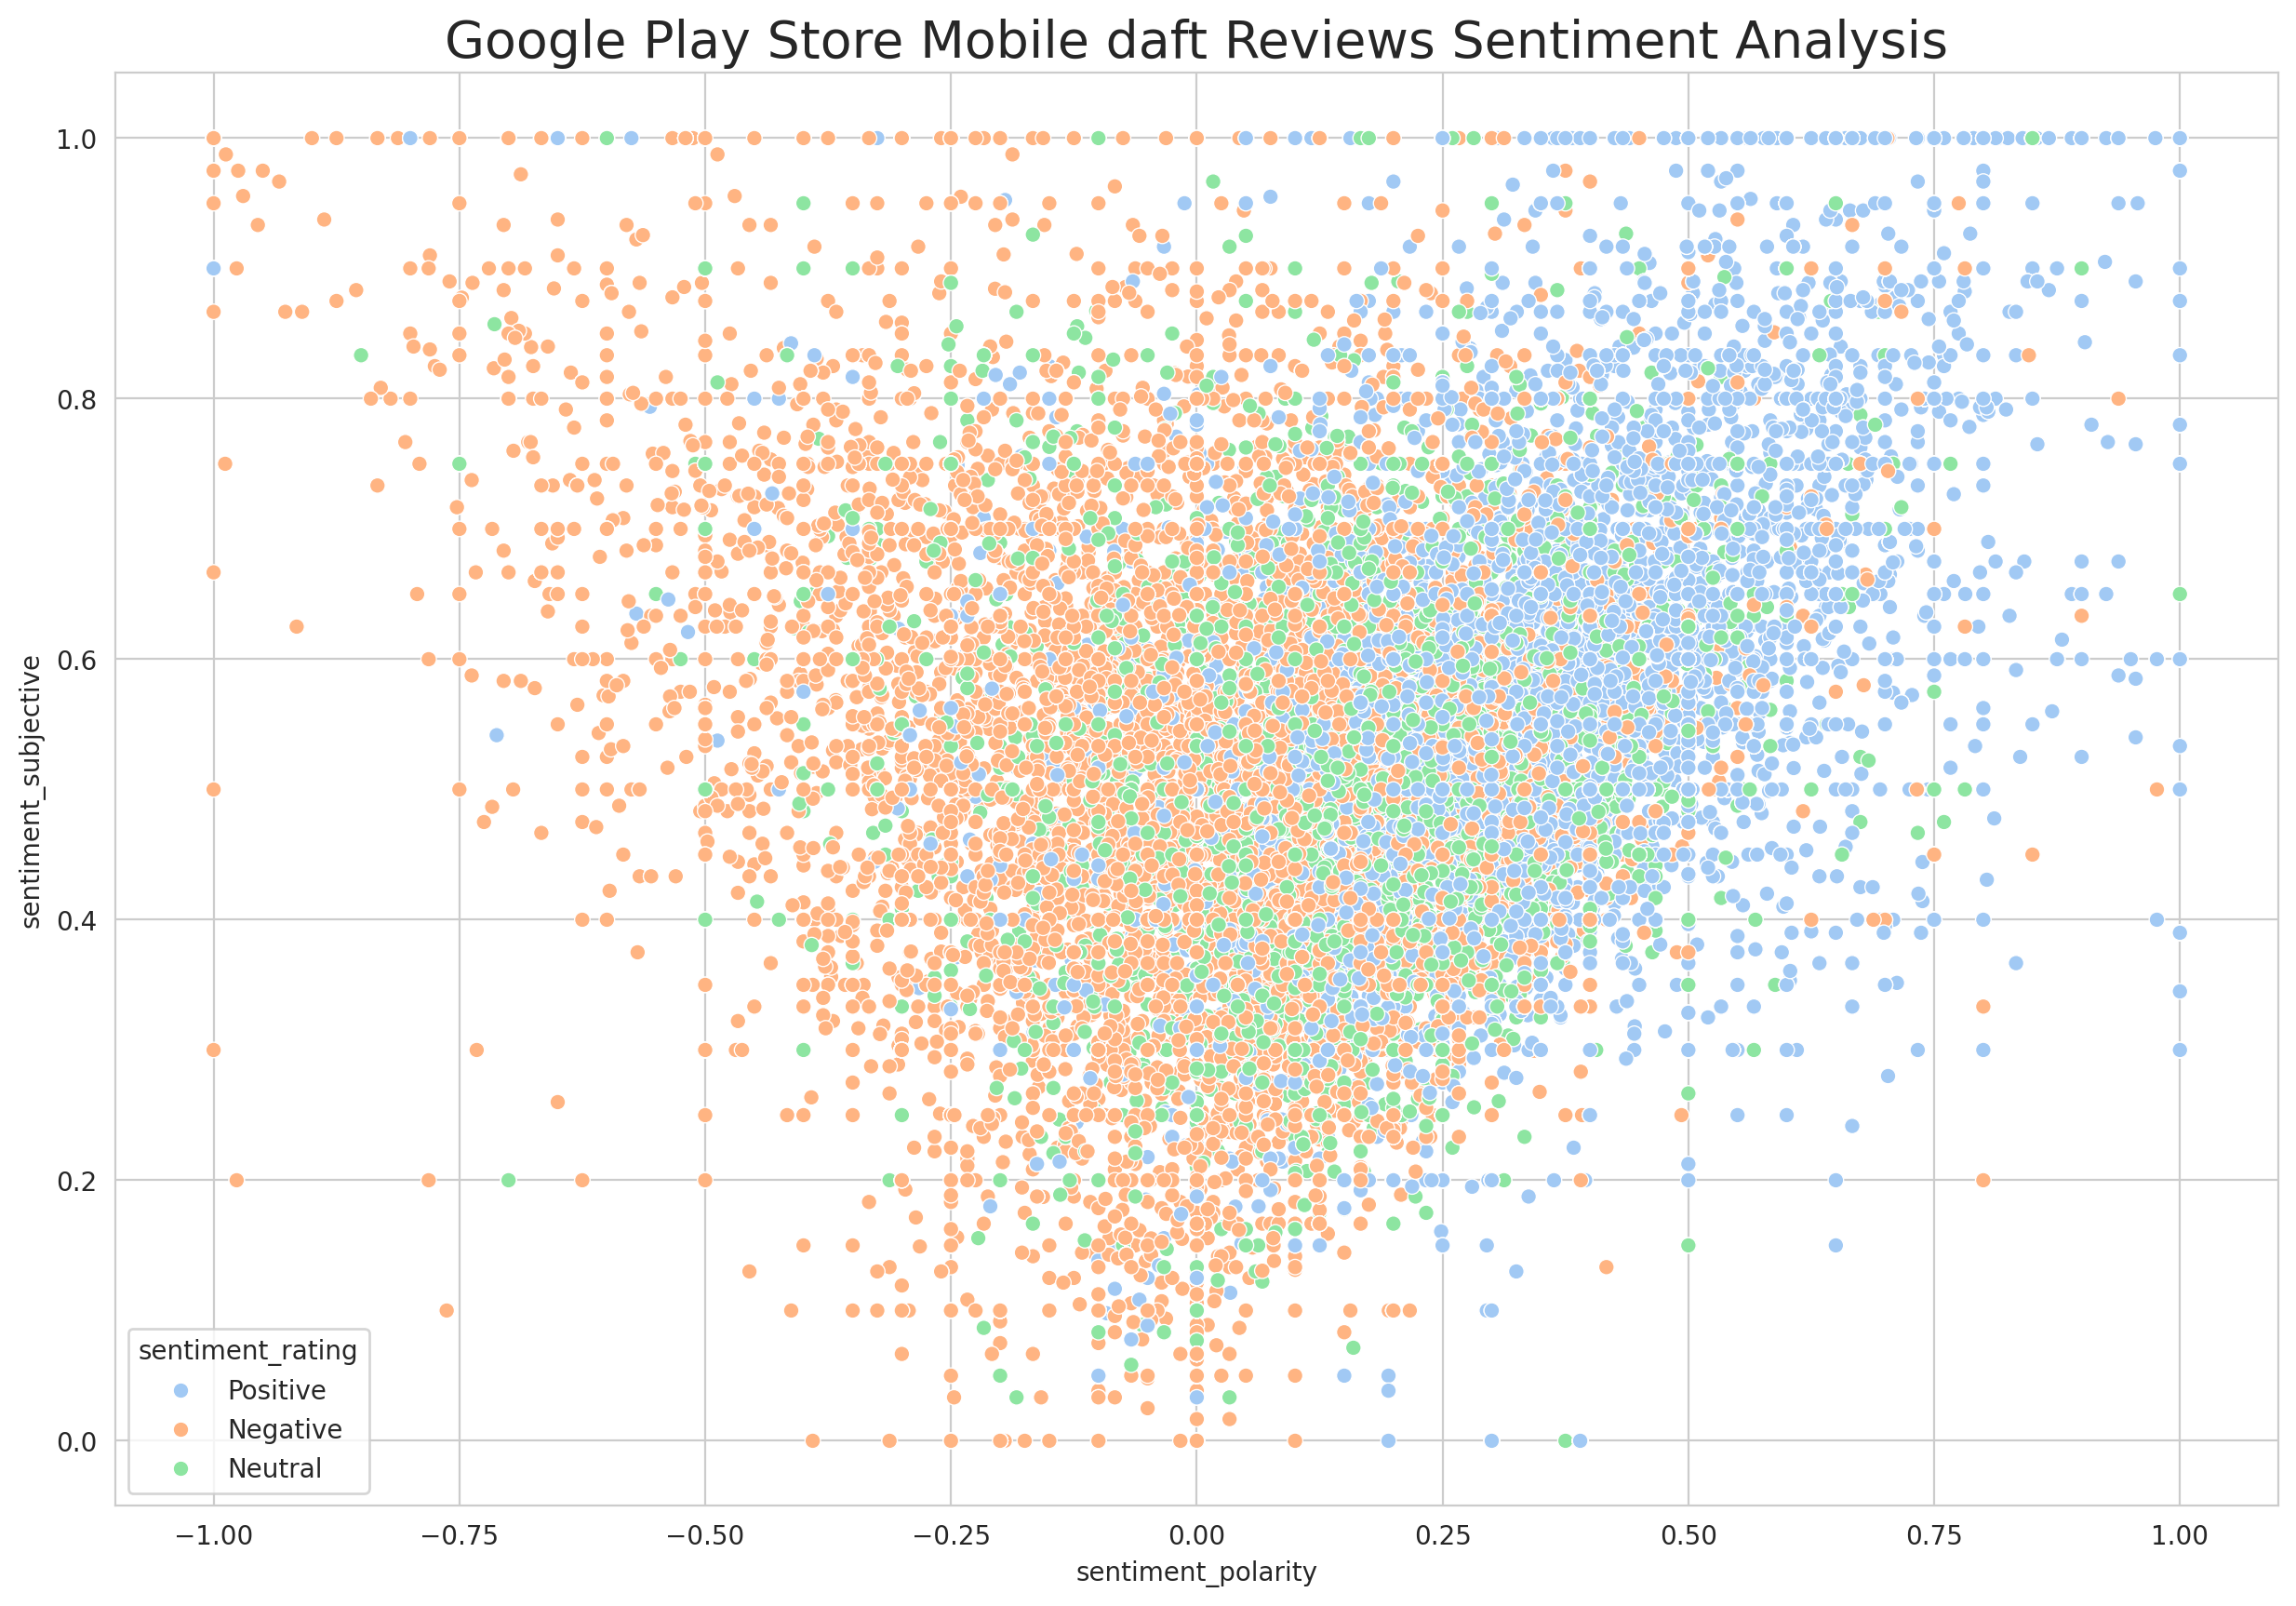

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Specify x and y using the 'x' and 'y' parameters within sns.scatterplot
sns.scatterplot(x=df_dafitrev['sentiment_polarity'], y=df_dafitrev['sentiment_subjective'],
                hue=df_dafitrev['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Google Play Store Mobile daft Reviews Sentiment Analysis", fontsize=20)
plt.show()

In [23]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

<ipython-input-23-6f9223a4813b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


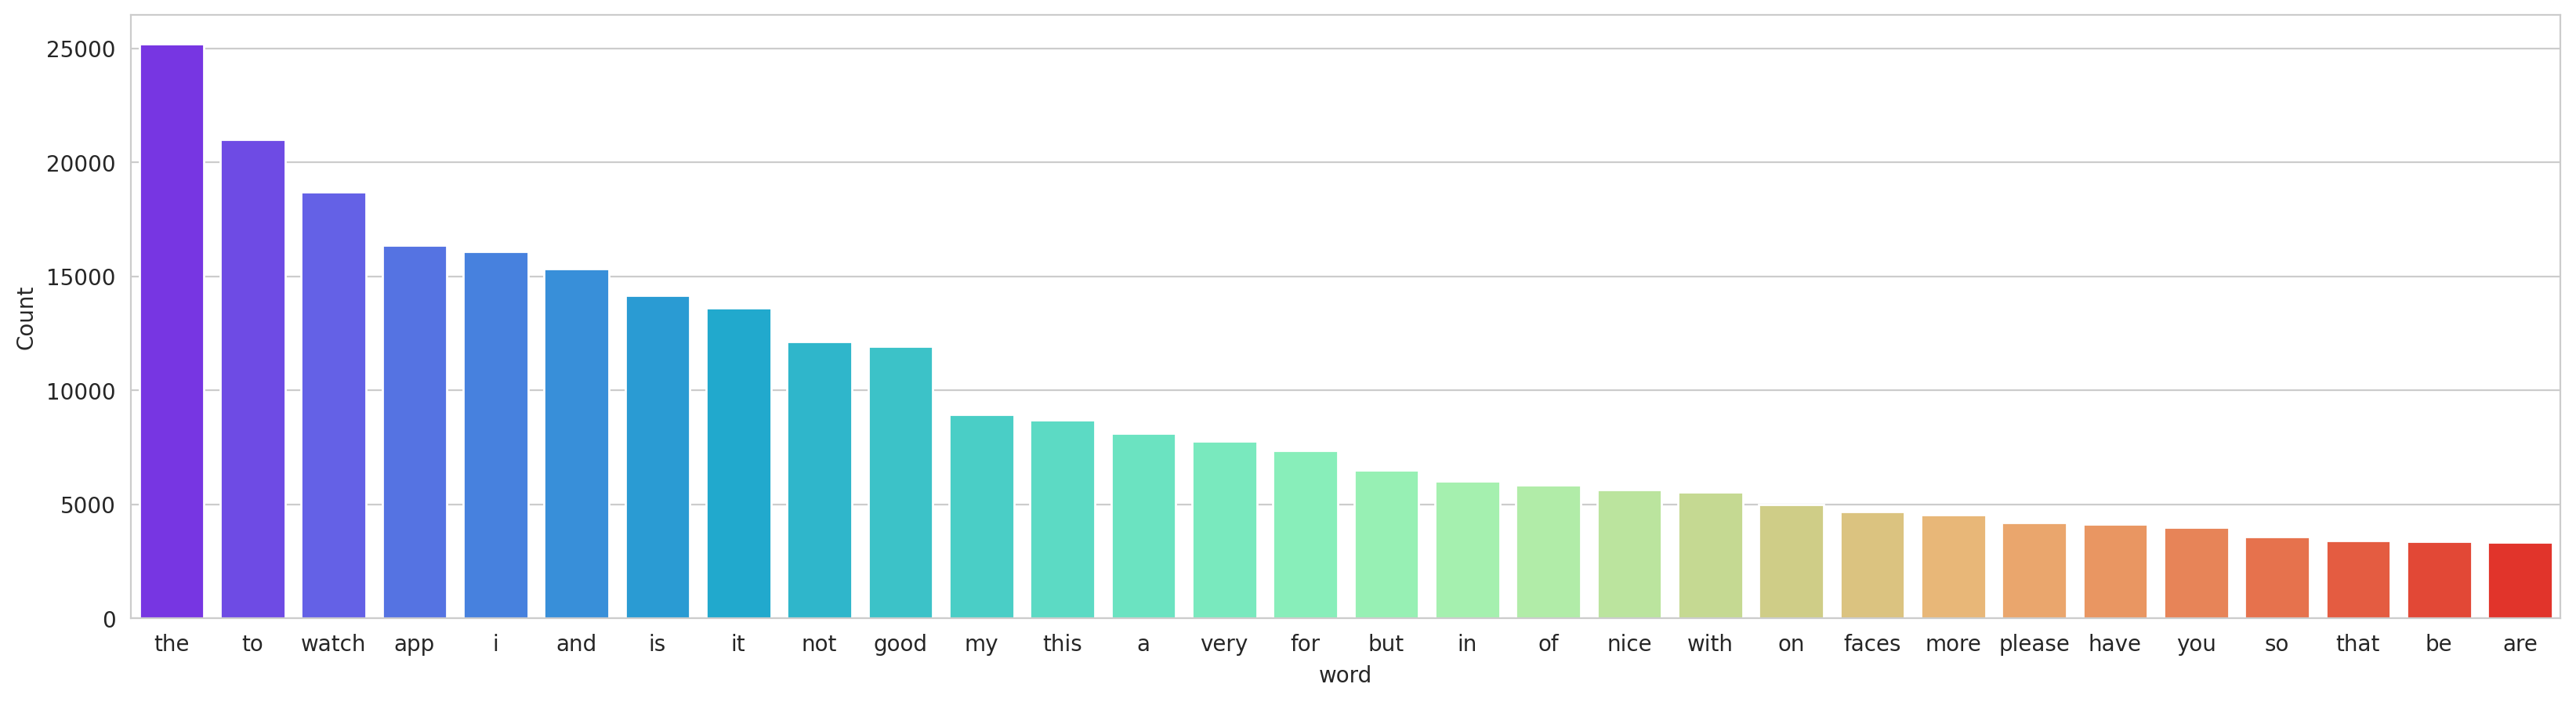

In [24]:
freq_words(df_dafitrev['content'])

In [25]:
# prompt: the [content] column hasnt been applied Indonesian stopwords removal using Sastrawi

!pip install Sastrawi

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Create stopword remover
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

# Apply stopword removal to the 'content' column
df_dafitrev['content'] = df_dafitrev['content'].apply(lambda x: stopword_remover.remove(x))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [26]:
# prompt: can you also apply English stopwords as well to the [content] column

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get English stopwords
english_stopwords = stopwords.words('english')

# Assuming df_dafitrev is your DataFrame and 'content' is the column
df_dafitrev['content'] = df_dafitrev['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
df_dafitrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,excellent,4,1.000000,1.000000,Positive
1,nice,5,0.600000,1.000000,Positive
2,really great app,5,0.800000,0.750000,Positive
3,"très facile naviguer, app user friendly et harmonieux aussi, la montre est formidable! aucun regrets! excellente idée pour un cadeau!",5,0.156250,0.350000,Positive
4,"get app sync cell phone, laptop, desktop. used google find customer care's phone number luck. called amazon customer care 4 days ago & said would call within 24 48 hours. gotten calls. see works.",1,0.000000,0.000000,Negative
...,...,...,...,...,...
58428,works great keeps heart rate oxygen,4,0.800000,0.750000,Positive
58429,"one touch reading all, allowing pairing data upload phone",3,0.000000,0.000000,Neutral
58430,search bracelet. can't get settings can't nothing it...,1,0.000000,0.000000,Negative
58431,good,5,0.700000,0.600000,Positive


In [28]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

<ipython-input-28-6f9223a4813b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


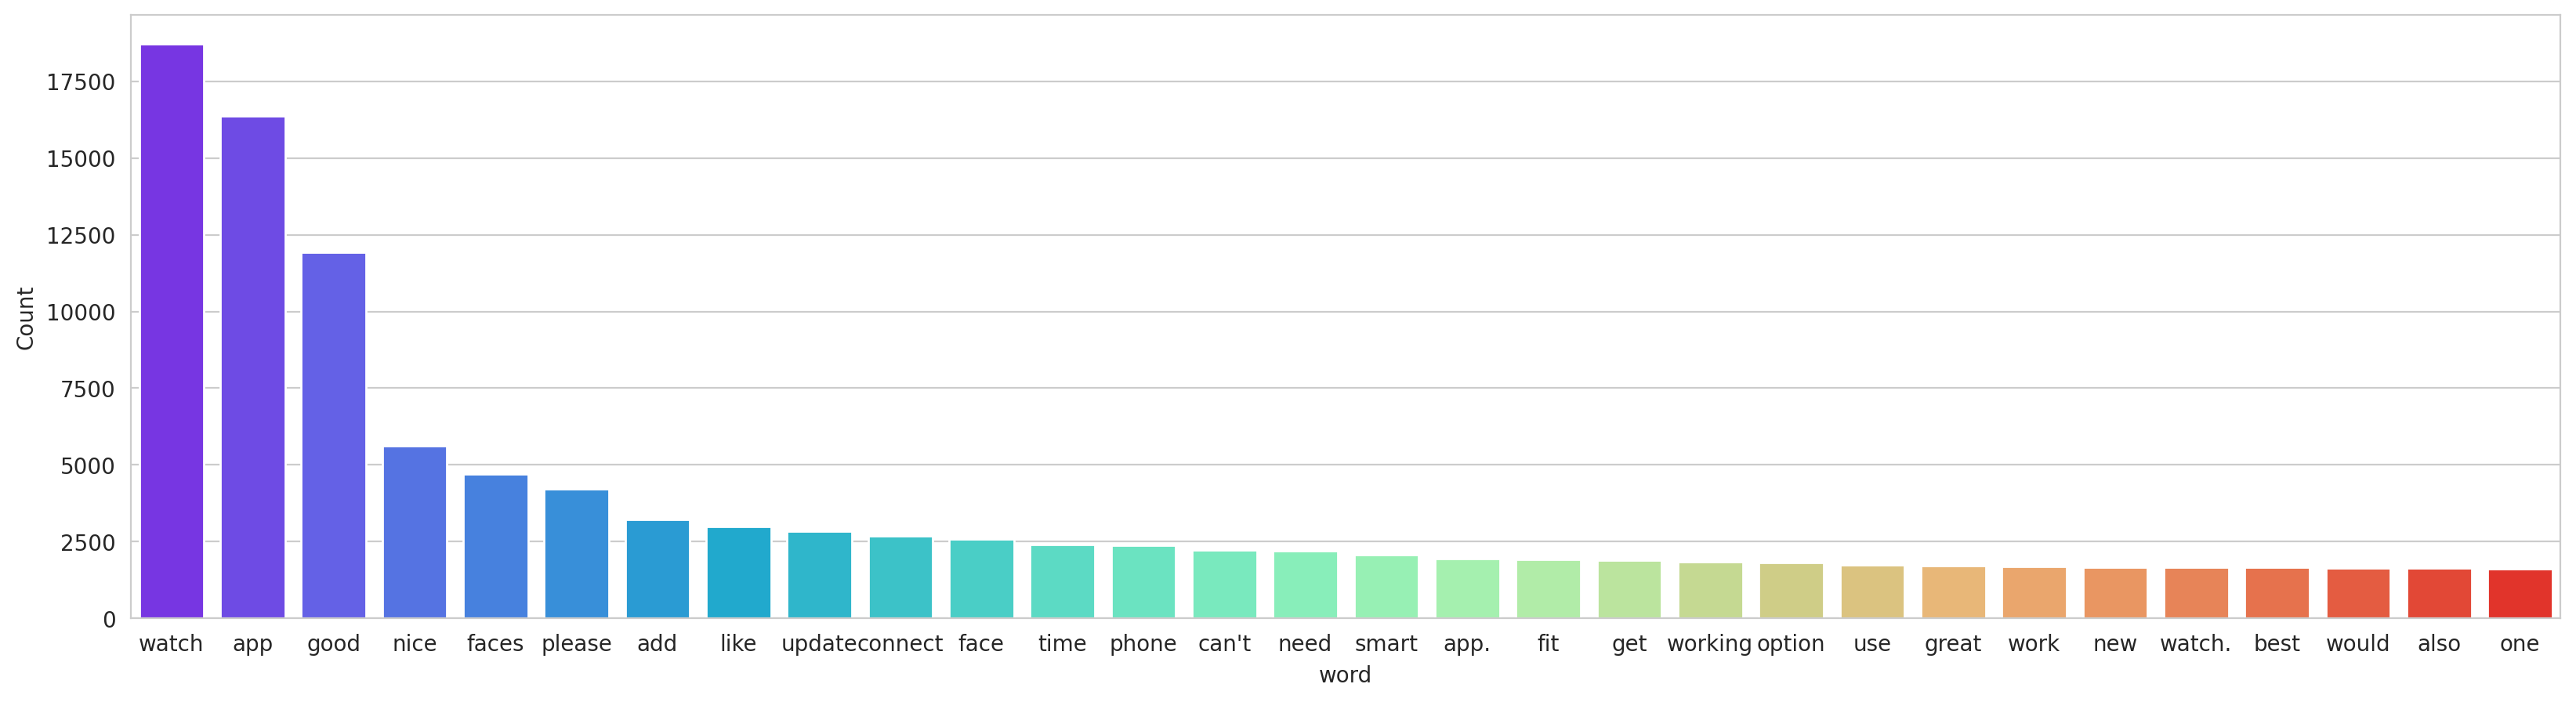

In [29]:
freq_words(df_dafitrev['content'])

In [33]:
#Count after stopwords
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_dafitrev['wordCount'] = [len(review.split()) for review in df_dafitrev['content']]
# The 'content' column already contains the reviews after stopword removal
df_dafitrev['wordCount_after_stopwords'] = [len(review.split()) for review in df_dafitrev['content']] # Use 'content' instead of 'review_after_stopwords'

## Homework TUGAS 1A

NLP Pipeline:
Tokenization
Lowering
Stopword Removal
Lemmatization
Stemming
Punctuations Removal
Expand Contractions
Spelling Correction
Rare Words Removal
Common Words Removal
